# Introduction

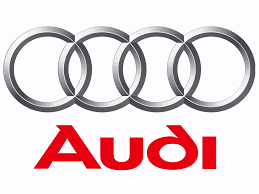

# Table of Contents

- [Loading Packages](#Loading-Packages)
- [Understanding Data](#Understanding-Data)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Preprocessing](#Data-Preprocessing)
- [Training Models](#Training-Models)
- [Evaluating Models](#Evaluating-Models)

## Loading Packages

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from time import perf_counter

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading data
df = pd.read_csv('audi.csv')

## Understanding Data

In [4]:
# The shape of dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (10668, 9)


In [5]:
# Preview of first 5 rows of dataset
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


## Data Cleaning

In [8]:
# Check for missing values
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [9]:
# Check for duplicate values
df.duplicated().sum()

103

In [10]:
# Drop duplicate observations
df = df.drop_duplicates(keep='first')

## Exploratory Data Analysis

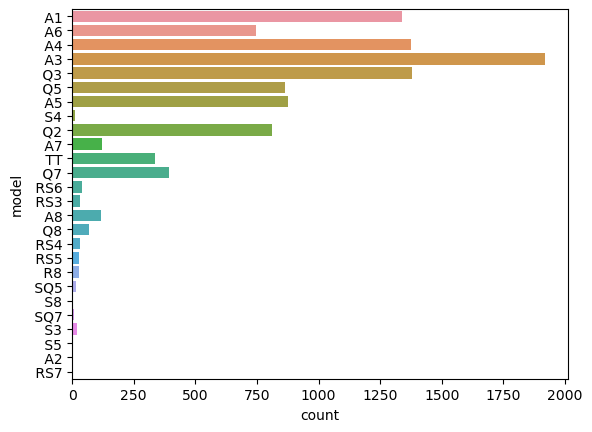

In [11]:
sns.countplot(y = df["model"])
plt.show()

The Audi A3 is the most common model (which happens to be their entry level vehicle) followed by the Q3 and A4

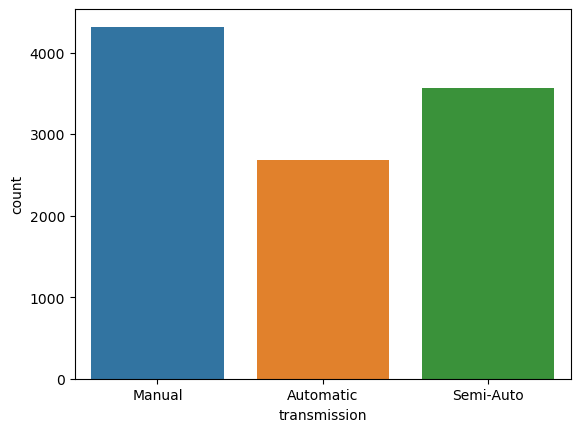

In [12]:
sns.countplot(df["transmission"])
plt.show()

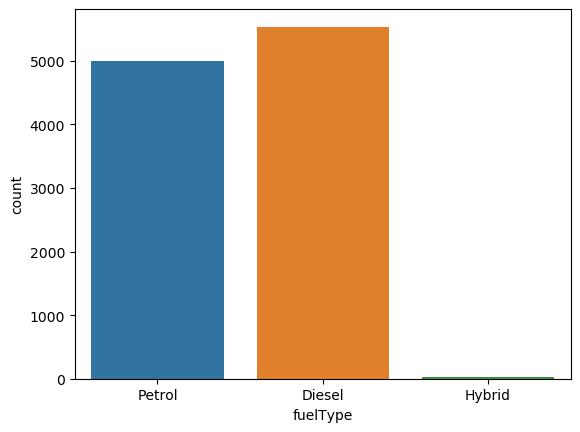

In [13]:
sns.countplot(df["fuelType"])
plt.show()

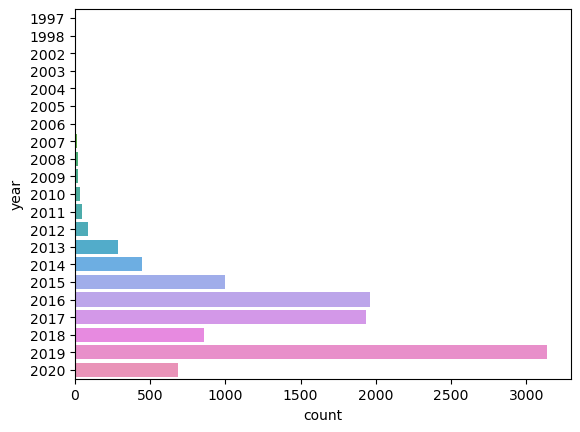

In [14]:
sns.countplot(y = df["year"])
plt.show()

The most common used Audi for sale was from the year 2019, followed by 2016 and 2017

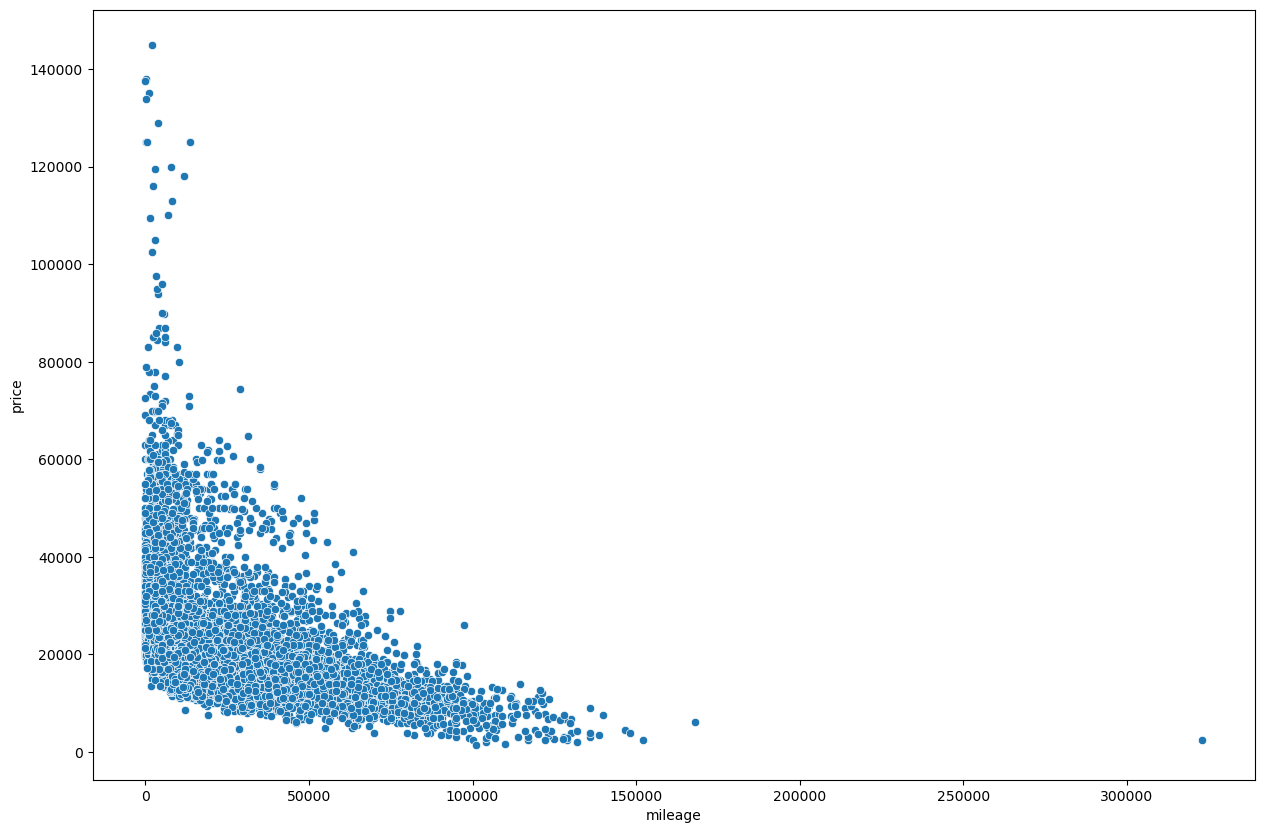

In [15]:
plt.figure(figsize=(15, 10))
sns.scatterplot(df["mileage"], df["price"])
plt.show()

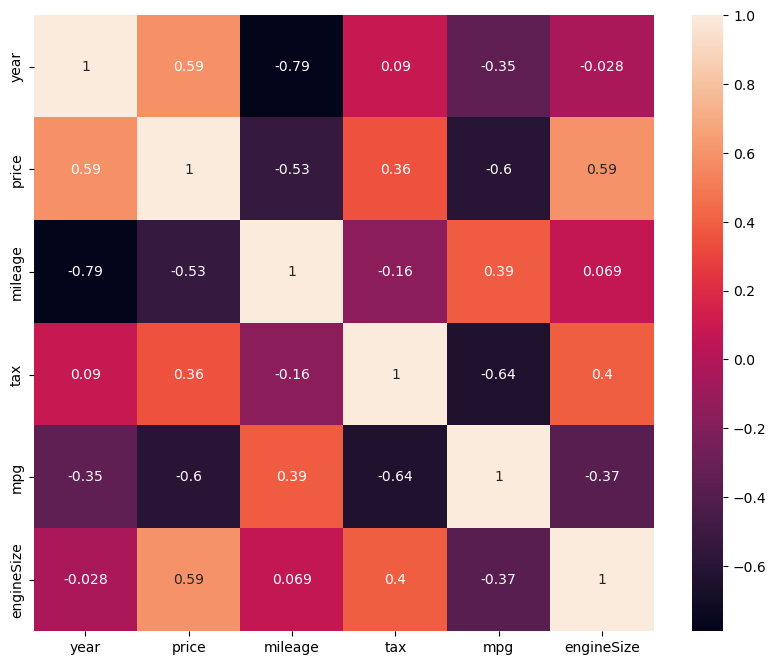

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

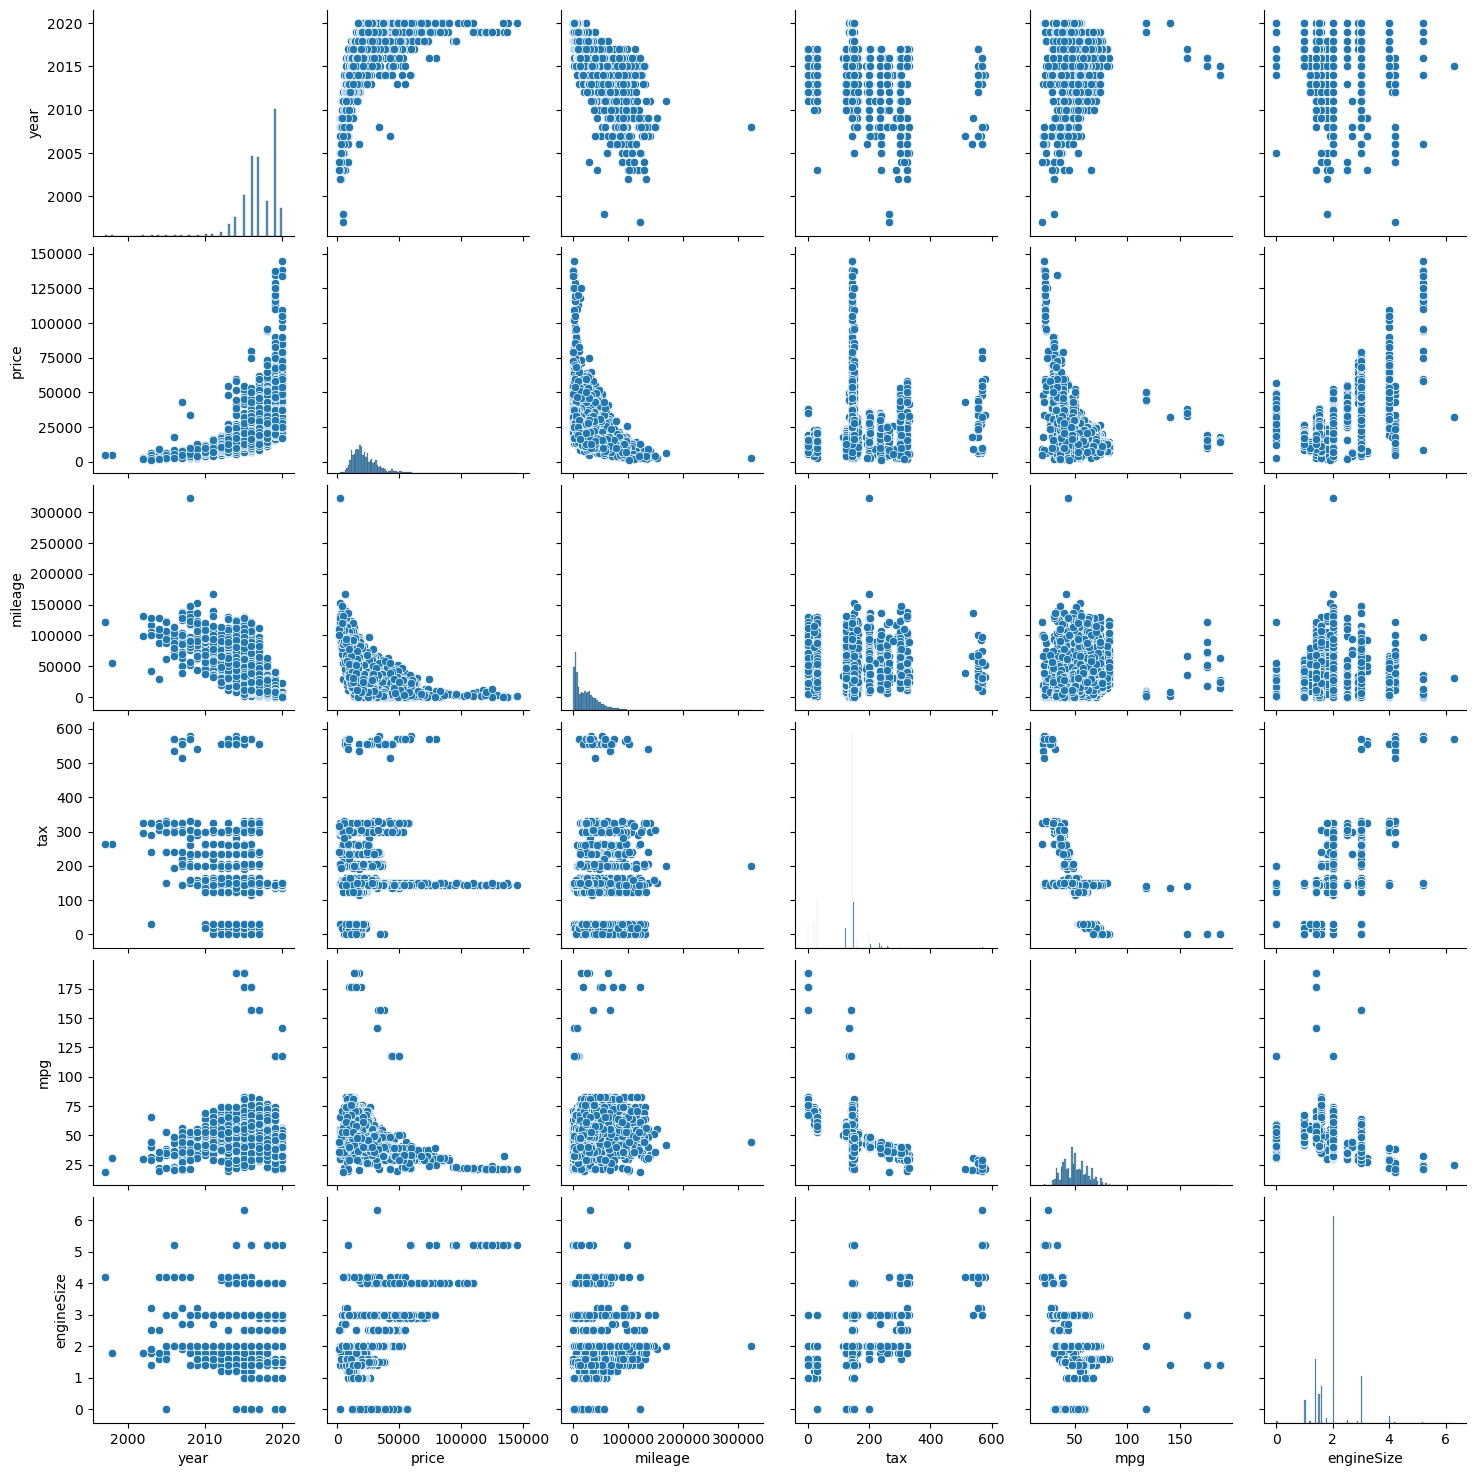

In [17]:
plt.figure(figsize=(15, 10))
sns.pairplot(df)
plt.show()

## Data Preprocessing

In [18]:
# Feature Engineering
df["age_of_car"] = 2021 - df["year"]
df = df.drop(columns=["year"])

In [19]:
# Encoding variables
df1 = pd.get_dummies(df)

In [20]:
# Standardizing variables
std = StandardScaler()
df_std = std.fit_transform(df1)
df_std = pd.DataFrame(df_std, columns = df1.columns)

In [21]:
df_std.head()

,price,mileage,tax,mpg,engineSize,age_of_car,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,-0.883253,-0.393254,0.357402,0.351966,-0.884062,0.039002,2.627169,-0.009729,-0.470818,-0.386806,...,-0.019462,-0.038945,-0.027528,-0.18124,-0.582997,1.203038,-0.714096,-1.049397,-0.051549,1.054988
1,-0.542030,0.479662,-1.571222,1.030836,0.111173,0.500425,-0.380638,-0.009729,-0.470818,-0.386806,...,-0.019462,-0.038945,-0.027528,-0.18124,1.715274,-0.831229,-0.714096,0.952929,-0.051549,-0.947878
2,-1.011212,0.212815,-1.422867,0.351966,-0.884062,0.500425,2.627169,-0.009729,-0.470818,-0.386806,...,-0.019462,-0.038945,-0.027528,-0.18124,-0.582997,1.203038,-0.714096,-1.049397,-0.051549,1.054988
3,-0.516438,0.042479,0.283224,1.269983,0.111173,0.039002,-0.380638,-0.009729,-0.470818,2.585273,...,-0.019462,-0.038945,-0.027528,-0.18124,1.715274,-0.831229,-0.714096,0.952929,-0.051549,-0.947878
4,-0.473785,-0.979108,0.283224,-0.095471,-1.547551,-0.883845,-0.380638,-0.009729,2.123962,-0.386806,...,-0.019462,-0.038945,-0.027528,-0.18124,-0.582997,1.203038,-0.714096,-1.049397,-0.051549,1.054988


In [22]:
# Splitting dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(df_std.drop(columns=['price']), df_std[['price']])

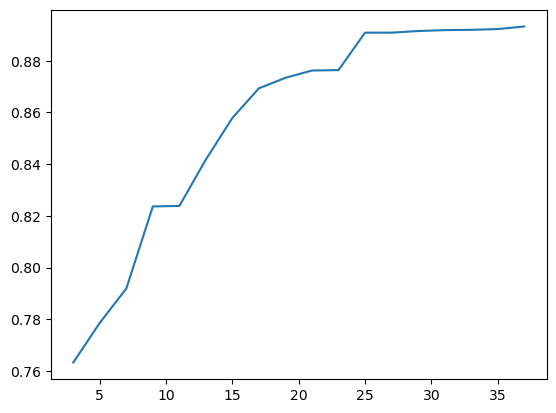

In [23]:
# Selecting best features for model
column_names = df_std.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range (3, 39, 2):
    selector = SelectKBest(f_regression, k = k)
    X_train1 = selector.fit_transform(X_train, y_train)
    X_test1 = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train1, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train1, y_train))
    r_squared_test.append(regressor.score(X_test1, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
plt.show()

Using SelectKBest() on f_regression, setting k as 25 will give us the best variables out of the 39 from the dataset with a score of 0.89

In [24]:
selector = SelectKBest(f_regression, k = 25)
X_train1 = selector.fit_transform(X_train, y_train)
X_test1 = selector.transform(X_test)
column_names[selector.get_support()]

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ A1',
       'model_ A3', 'model_ A4', 'model_ A7', 'model_ A8', 'model_ Q5',
       'model_ Q7', 'model_ Q8', 'model_ R8', 'model_ RS3', 'model_ RS4',
       'model_ RS5', 'model_ RS6', 'model_ SQ5', 'model_ SQ7',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Petrol'],
      dtype='object')

## Training Models

In [25]:
models = {
    "Linear Regr": {"model": LinearRegression(), "perf":0},
    "Ridge": {"model": Ridge(), "perf":0},
    "Lasso": {"model": Lasso(), "perf":0},
    "Linear SVR": {"model": SVR(), "perf":0},
    "DecisionTree Regr": {"model": RandomForestRegressor(), "perf":0},
    "MLP Regr": {"model": MLPRegressor(), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train1, y_train)
    duration = perf_counter() - start
    duration = round(duration, 2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Linear Regr          trained in 0.01 sec
Ridge                trained in 0.01 sec
Lasso                trained in 0.07 sec
Linear SVR           trained in 3.62 sec
DecisionTree Regr    trained in 0.32 sec
MLP Regr             trained in 97.85 sec


## Evaluating Models

In [26]:
model_acc = []
for name, model in models.items():
    model_acc.append([name, model["model"].score(X_test1, y_test), model["perf"]])

In [27]:
df_acc = pd.DataFrame(model_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training Time (sec)']
df_acc.sort_values(by = 'Accuracy', ascending=False, inplace=True)
df_acc.reset_index(drop=True, inplace=True)
df_acc

,Model,Accuracy,Training Time (sec)
0,DecisionTree Regr,0.959648,0.32
1,MLP Regr,0.954065,97.85
2,Linear SVR,0.928595,3.62
3,Ridge,0.886945,0.01
4,Linear Regr,0.886914,0.01
5,Lasso,-0.002930,0.07


A Decision Tree Regression is the best algorithm for this model with a score of 0.95 and a training time of 0.32 seconds

In [54]:
treeregr = RandomForestRegressor()
treeregr.fit(X_train1, y_train)
y_pred = treeregr.predict(X_test1)
mse = MSE(y_test, y_pred)
print("RMSE using DecisionTreeRegression:", np.sqrt(mse))
print("R2 using DecisionTreeRegression:", r2_score(y_test, y_pred))

RMSE using DecisionTreeRegression: 0.22016007482514072
R2 using DecisionTreeRegression: 0.9587512738459318
